## Weather data Analysis Using NumPy
### data is from http://www.ncdc.noaa.gov 

In [1]:
import numpy as np
import matplotlib.pyplot as pp
import seaborn

In [2]:
%matplotlib inline

In [1]:
# commenting since we already have staion files
import urllib.request
urllib.request.urlretrieve('ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt', 'stations.txt')
urllib.request.urlretrieve('ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt', 'readme.txt')

('readme.txt', <email.message.Message at 0x7f6fb426def0>)

In [4]:
open('stations.txt').readlines()[:10]

['ACW00011604  17.1167  -61.7833   10.1    ST JOHNS COOLIDGE FLD                       \n',
 'ACW00011647  17.1333  -61.7833   19.2    ST JOHNS                                    \n',
 'AE000041196  25.3330   55.5170   34.0    SHARJAH INTER. AIRP            GSN     41196\n',
 'AEM00041194  25.2550   55.3640   10.4    DUBAI INTL                             41194\n',
 'AEM00041217  24.4330   54.6510   26.8    ABU DHABI INTL                         41217\n',
 'AEM00041218  24.2620   55.6090  264.9    AL AIN INTL                            41218\n',
 'AF000040930  35.3170   69.0170 3366.0    NORTH-SALANG                   GSN     40930\n',
 'AFM00040938  34.2100   62.2280  977.2    HERAT                                  40938\n',
 'AFM00040948  34.5660   69.2120 1791.3    KABUL INTL                             40948\n',
 'AFM00040990  31.5000   65.8500 1010.0    KANDAHAR AIRPORT                       40990\n']

In [5]:
stations={}
for line in open('stations.txt', 'r'):
    if 'GSN' in line:
        fields = line.split()
        stations[fields[0]] = ' '.join(fields[4:])        

In [6]:
len(stations)

994

In [7]:
stations['AF000040930']

'NORTH-SALANG GSN 40930'

In [8]:
def findstation(s):
    found = {code: name for code, name in stations.items() if s in name}
    print(found)

In [9]:
findstation('DELHI')

{'IN022021900': 'NEW DELHI/SAFDARJUN GSN 42182'}


In [10]:
findstation('BANGALORE')

{'IN009010100': 'BANGALORE GSN 43295'}


In [11]:
findstation('MADRAS')

{'IN020040900': 'MADRAS/MINAMBAKKAM GSN 43279'}


In [12]:
findstation('CHERRAPUNJI')

{'IN014020800': 'CHERRAPUNJI GSN 42515'}


In [13]:
# US destinations LIHUE, SAN DIEGO, MINNEAPOLIS, IRKUTSK
datastations = ['USW00022536','USW00023188','USW00014922','RSM00030710']

## Download specific daily weather data

In [14]:
# comment of download for future runs
import urllib.request
for stn in datastations:
    file=stn+'.dly'
    path='ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/all/'
    print(urllib.request.urlretrieve(path + file, file))

('USW00022536.dly', <email.message.Message object at 0x7fe072521b00>)
('USW00023188.dly', <email.message.Message object at 0x7fe072521c50>)
('USW00014922.dly', <email.message.Message object at 0x7fe072521da0>)
('RSM00030710.dly', <email.message.Message object at 0x7fe072521f28>)


## Now Do Temprature Analysis

In [15]:
open('USW00022536.dly','r').readlines()[:10]

['USW00022536195002TMAX  256  0  256  0  256  0  267  0  217  0  228  0  256  0  272  0  256  0  256  0  256  0  244  0  256  0  256  0  244  0  244  0  250  0  256  0  239  0  250  0  256  0  256  0  267  0  261  0  267  0  267  0  261  0  261  0-9999   -9999   -9999   \n',
 'USW00022536195002TMIN  178  0  156  0  161  0  167  0  167  0  167  0  189  0  211  0  206  0  217  0  217  0  211  0  200  0  200  0  206  0  183  0  206  0  206  0  206  0  194  0  206  0  200  0  206  0  200  0  211  0  183  0  172  0  200  0-9999   -9999   -9999   \n',
 'USW00022536195002PRCP    0  0    0  0    0  0    0  0  737  0  406  0   36  0   38  0    0T 0    0T 0    0  0    0T 0   18  0    5  0   10  0   18  0   15  0    5  0    0T 0    0T 0   23  0   10  0    3  0   48  0    0T 0    0T 0    0T 0    5  0-9999   -9999   -9999   \n',
 'USW00022536195002SNOW    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0

In [16]:
open('readme.txt', 'r').readlines()[98:121]

['------------------------------\n',
 'Variable   Columns   Type\n',
 '------------------------------\n',
 'ID            1-11   Character\n',
 'YEAR         12-15   Integer\n',
 'MONTH        16-17   Integer\n',
 'ELEMENT      18-21   Character\n',
 'VALUE1       22-26   Integer\n',
 'MFLAG1       27-27   Character\n',
 'QFLAG1       28-28   Character\n',
 'SFLAG1       29-29   Character\n',
 'VALUE2       30-34   Integer\n',
 'MFLAG2       35-35   Character\n',
 'QFLAG2       36-36   Character\n',
 'SFLAG2       37-37   Character\n',
 '  .           .          .\n',
 '  .           .          .\n',
 '  .           .          .\n',
 'VALUE31    262-266   Integer\n',
 'MFLAG31    267-267   Character\n',
 'QFLAG31    268-268   Character\n',
 'SFLAG31    269-269   Character\n',
 '------------------------------\n']

In [17]:
def parsefile(filename):
    return np.genfromtxt(filename, 
                         delimiter = dly_delimiter,
                        usecols=dly_usecols,
                        dtype=dly_dtype,
                        names=dly_names)

In [18]:
dly_delimiter = [11,4,2,4] + [5,1,1,1] * 31
dly_usecols = [1,2,3] + [4*i for i in range(1,32)]
dly_dtype = [np.int32,np.int32,(np.str_,4)] + [np.int32] * 31
dly_names = ['year','month','obs'] + [str(day) for day in range(1,31+1)]

In [19]:
lihue = parsefile('USW00022536.dly')

In [20]:
lihue

array([(1950, 2, 'TMAX',   256,   256,   256, 267, 217, 228,   256,   272,   256,   256,   256,   244,   256,   256,   244,   244,   250,   256, 239,   250,   256,   256,   267,   261,   267,   267,   261,   261, -9999, -9999, -9999),
       (1950, 2, 'TMIN',   178,   156,   161, 167, 167, 167,   189,   211,   206,   217,   217,   211,   200,   200,   206,   183,   206,   206, 206,   194,   206,   200,   206,   200,   211,   183,   172,   200, -9999, -9999, -9999),
       (1950, 2, 'PRCP',     0,     0,     0,   0, 737, 406,    36,    38,     0,     0,     0,     0,    18,     5,    10,    18,    15,     5,   0,     0,    23,    10,     3,    48,     0,     0,     0,     5, -9999, -9999, -9999),
       ...,
       (2018, 6, 'WSF5',   116,   121,   130, 152, 125, 112,   125,    85,    98,   121,   107,   125,    98,    89,    94,    67,    76,    72,  63,    67,    94, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999),
       (2018, 6, 'WT01',     1,     1, -9999,   

In [21]:
def unroll(record):
    startdate = np.datetime64('{}-{:02}'.format(record['year'],record['month']))
    dates = np.arange(startdate, startdate + np.timedelta64(1, 'M'), np.timedelta64(1, 'D'))
    # temperature is recorded as 10x hence divide by 10
    rows = [(date, record[str(i+1)]/10) for i, date in enumerate(dates)]
    return np.array(rows,dtype=[('date','M8[D]'),('value','d')])

## Boolean mask to mark all items -999.9 as nan

In [22]:
unroll(lihue[0])

array([('1950-02-01', 25.6), ('1950-02-02', 25.6), ('1950-02-03', 25.6),
       ('1950-02-04', 26.7), ('1950-02-05', 21.7), ('1950-02-06', 22.8),
       ('1950-02-07', 25.6), ('1950-02-08', 27.2), ('1950-02-09', 25.6),
       ('1950-02-10', 25.6), ('1950-02-11', 25.6), ('1950-02-12', 24.4),
       ('1950-02-13', 25.6), ('1950-02-14', 25.6), ('1950-02-15', 24.4),
       ('1950-02-16', 24.4), ('1950-02-17', 25. ), ('1950-02-18', 25.6),
       ('1950-02-19', 23.9), ('1950-02-20', 25. ), ('1950-02-21', 25.6),
       ('1950-02-22', 25.6), ('1950-02-23', 26.7), ('1950-02-24', 26.1),
       ('1950-02-25', 26.7), ('1950-02-26', 26.7), ('1950-02-27', 26.1),
       ('1950-02-28', 26.1)], dtype=[('date', '<M8[D]'), ('value', '<f8')])

In [23]:
def getobs(filename, obs):
    data = np.concatenate([unroll(row) for row in parsefile(filename) if row[2] == obs])
    # if items have -999.9 then the the mean etc will get wrong hence set them nan
    data['value'][data['value'] == -999.9] = np.nan
    return data

## Get maximum temprature by dates for a given station 

In [24]:
lihue_tmax = getobs('USW00022536.dly', 'TMAX')
lihue_tmax

array([('1950-02-01', 25.6), ('1950-02-02', 25.6), ('1950-02-03', 25.6),
       ..., ('2018-06-28',  nan), ('2018-06-29',  nan),
       ('2018-06-30',  nan)], dtype=[('date', '<M8[D]'), ('value', '<f8')])

In [25]:
lihue_tmin = getobs('USW00022536.dly', 'TMIN')
lihue_tmin

array([('1950-02-01', 17.8), ('1950-02-02', 15.6), ('1950-02-03', 16.1),
       ..., ('2018-06-28',  nan), ('2018-06-29',  nan),
       ('2018-06-30',  nan)], dtype=[('date', '<M8[D]'), ('value', '<f8')])

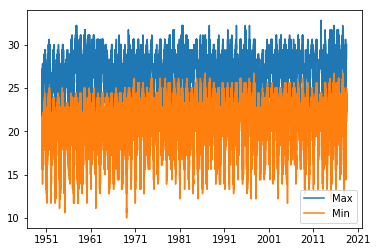

In [26]:
pp.plot(lihue_tmax['date'], lihue_tmax['value'])
pp.plot(lihue_tmin['date'], lihue_tmin['value'])
pp.legend(['Max', 'Min'])

## Plot mean of values over a month

### but np.mean(array_with_nan) will return nan

In [27]:
np.mean(lihue_tmax['value'])

nan

## Interpolate - replace missing values using interpolation 

### Example of Interpol

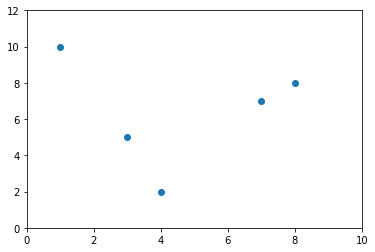

In [28]:
x = np.array([1, 3, 4, 7, 8], 'd')
y = np.array([10, 5, 2, 7, 8], 'd')
pp.axis([0, 10, 0, 12])
pp.plot(x, y, 'o')

In [29]:
xs = np.linspace(1, 10)

In [30]:
ys = np.interp(xs, x, y)

[0, 10, 0, 12]

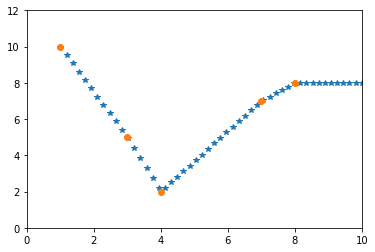

In [31]:
pp.plot(xs, ys, "*")
pp.plot(x, y, 'o')
pp.axis([0, 10, 0, 12])

## Interpolate and replace all nan values

In [32]:
def fillnans(data):
    # interpollate cannot work on date objects, we need to convert to float
    date_float = data['date'].astype(np.float)
    nan = np.isnan(data['value'])
    data['value'][nan] = np.interp(date_float[nan], date_float[~nan], data['value'][~nan])    

In [33]:
fillnans(lihue_tmax)
fillnans(lihue_tmin)

## Mean of Max temprature and Min Temprature 

In [34]:
np.mean(lihue_tmax['value']), np.mean(lihue_tmin['value'])

(27.316684676031535, 21.06667467082883)

# Smoothing data with a running mean

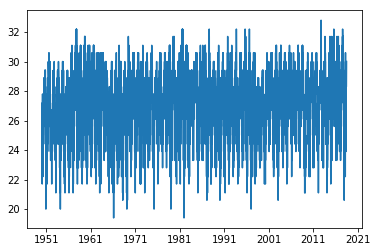

In [35]:
pp.plot(lihue_tmax['date'], lihue_tmax['value'])

### Correlate - take a window of values and multiply with column vector with each value divided by window size to sum and avargage

In [36]:
def plot_smoothed(t, win=10):
    smoothed = np.correlate(t['value'], np.ones(win)/win, 'same')
    pp.plot(t['date'], smoothed)

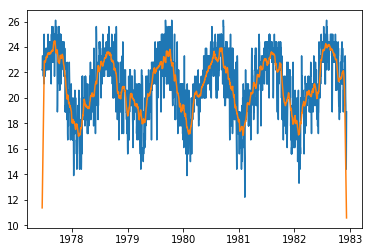

In [37]:
pp.plot(lihue_tmin[10000:12000]['date'], lihue_tmin[10000:12000]['value'])
plot_smoothed(lihue_tmin[10000:12000], 28)

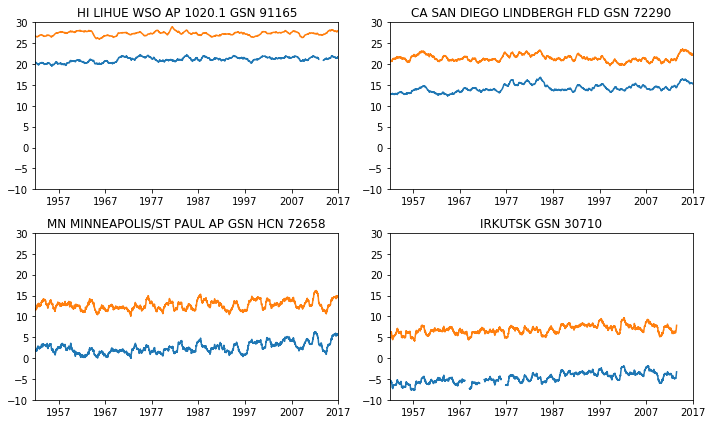

In [57]:
def plotStations(stationCodes):    
    pp.figure(figsize=(10,6))
    for i, code in enumerate(stationCodes):
        pp.subplot(2,2, i+1)
        plot_smoothed(getobs("{}.dly".format(code), 'TMIN'), 365)    
        plot_smoothed(getobs("{}.dly".format(code), 'TMAX'), 365)
        pp.title(stations[code])
        pp.axis(xmin=np.datetime64('1952'), xmax=np.datetime64('2017'), ymin=-10, ymax=30)
    pp.tight_layout()
plotStations(datastations)

In [39]:
getobs("{}.dly".format(datastations[0]), 'TMIN')

array([('1950-02-01', 17.8), ('1950-02-02', 15.6), ('1950-02-03', 16.1),
       ..., ('2018-06-28',  nan), ('2018-06-29',  nan),
       ('2018-06-30',  nan)], dtype=[('date', '<M8[D]'), ('value', '<f8')])

In [40]:
def selectyear(data, year):
    start = np.datetime64("{}".format(year))
    end = start + np.timedelta64(1, 'Y')
    return data[(data['date']>=start) & (data['date'] < end)]['value']

In [41]:
lihue_tmin_all = np.vstack([selectyear(lihue_tmin, year)[:365] for year in range(1951, 2014+1)])

In [56]:
lihue_tmin_all, lihue_tmin

(array([[17.8, 17.8, 17.2, ..., 20.6, 19.4, 18.9],
        [17.2, 19.4, 21.7, ..., 21.7, 20.6, 17.8],
        [17.8, 18.3, 19.4, ..., 13.3, 15. , 15. ],
        ...,
        [17.8, 17.2, 17.8, ..., 18.3, 18.9, 19.4],
        [20. , 20. , 19.4, ..., 19.4, 20. , 18.3],
        [17.8, 20. , 17.8, ..., 18.9, 16.1, 14.4]]),
 array([('1950-02-01', 17.8), ('1950-02-02', 15.6), ('1950-02-03', 16.1),
        ..., ('2018-06-28', 24.4), ('2018-06-29', 24.4),
        ('2018-06-30', 24.4)], dtype=[('date', '<M8[D]'), ('value', '<f8')]))

In [43]:
lihue_tmin_all.size, lihue_tmin_all.shape, lihue_tmin_all.ndim

(23360, (64, 365), 2)

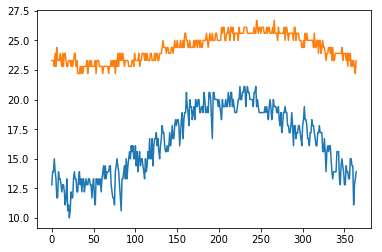

In [44]:
lihue_tmin_recordmin = np.min(lihue_tmin_all, axis=0)
lihue_tmin_recordmax = np.max(lihue_tmin_all, axis=0)
pp.plot(lihue_tmin_recordmin, '-')
pp.plot(lihue_tmin_recordmax, '-')

In [45]:
lihue_tmax_all = np.vstack([selectyear(lihue_tmax, year)[:365] for year in range(1951, 2014+1)])

In [46]:
days = np.arange(1, 365+1)

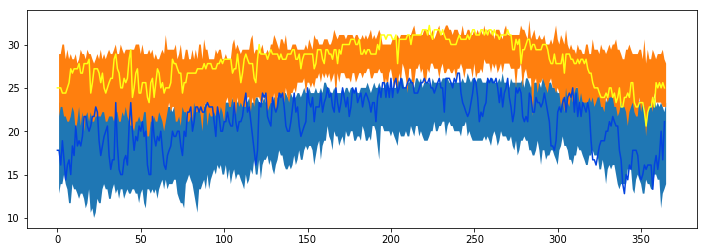

In [58]:
pp.figure(figsize=(12,4))

pp.fill_between(days, np.min(lihue_tmin_all, axis=0), np.max(lihue_tmin_all, axis=0))
pp.plot(selectyear(lihue_tmin, 2017), '-', color='xkcd:blue')

pp.fill_between(days, np.min(lihue_tmax_all, axis=0), np.max(lihue_tmax_all, axis=0))
pp.plot(selectyear(lihue_tmax, 2017), '-', color='xkcd:yellow')




# Challenge

## Find  the year with highest mean TMAX in Minneapolis

### Get Data for Minneapolis

In [59]:
minne_tmax = getobs('USW00014922.dly', 'TMAX')
minne_tmin = getobs('USW00014922.dly', 'TMIN')
fillnans(minne_tmax)
fillnans(minne_tmin)

In [60]:
year_range = [i for i in range(1940, 2017+1)]
minne_tmax_mean = [np.mean(selectyear(minne_tmax, year)[:365]) for year in year_range]

In [61]:
np.max(minne_tmax_mean)

15.629041095890411

In [62]:
year_index1=np.argmax(minne_tmax_mean)
minne_warmest = year_range[year_index1]
minne_warmest, minne_tmax_mean[year_index1]

(2012, 15.629041095890411)

## Found hottest year Minneapolis was 2012

In [67]:
sandiego_tmin = getobs('USW00023188.dly', 'TMIN')
sandiego_tmax = getobs('USW00023188.dly', 'TMAX')
fillnans(sandiego_tmin)
fillnans(sandiego_tmax)

In [64]:
sandiego_tmin_mean = [np.mean(selectyear(sandiego_tmin, year)[:365]) for year in year_range]

In [65]:
year_index2 = np.argmin(sandiego_tmin_mean)
sandiego_coldest = year_range[year_index2]
sandiego_coldest, sandiego_tmin_mean[year_index2]

(1948, 11.66082191780822)

## Found Coldest year San Diego was 1948

Text(0.5,1,'2012 in Minnepolis vs 1948 in San Diego ')

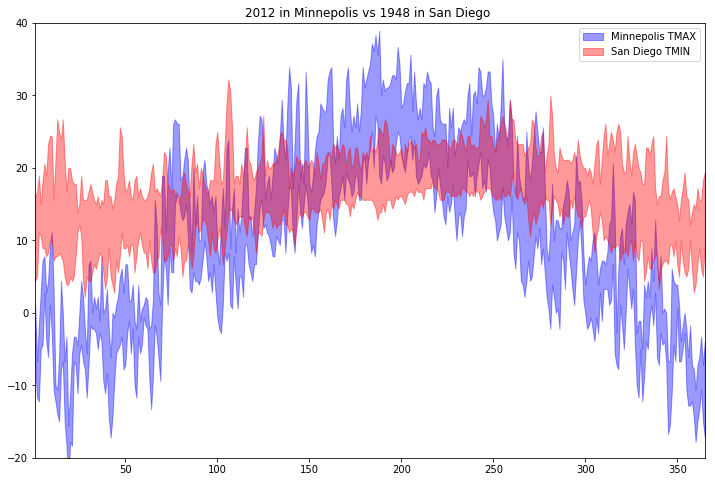

In [68]:
pp.figure(figsize=(12,8))
days = np.arange(1, 365+1)
pp.fill_between(days, selectyear(minne_tmin, minne_warmest)[:365], selectyear(minne_tmax, minne_warmest)[:365], color='b', alpha=0.4)
pp.fill_between(days, selectyear(sandiego_tmin, sandiego_coldest)[:365], selectyear(sandiego_tmax, sandiego_coldest)[:365], color='r', alpha=0.4)
pp.axis(xmin=1, xmax=365, ymin=-20, ymax=40)
pp.legend(['Minnepolis TMAX', 'San Diego TMIN'])
pp.title("{} in Minnepolis vs {} in San Diego ".format(minne_warmest, sandiego_coldest))